In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
cars=pd.read_csv("/content/Cars.csv")

In [ ]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
# Check for the missing valu
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


## Scatter plot between variables along with histograms

Check for assumption: Independent variables are independent of each other.

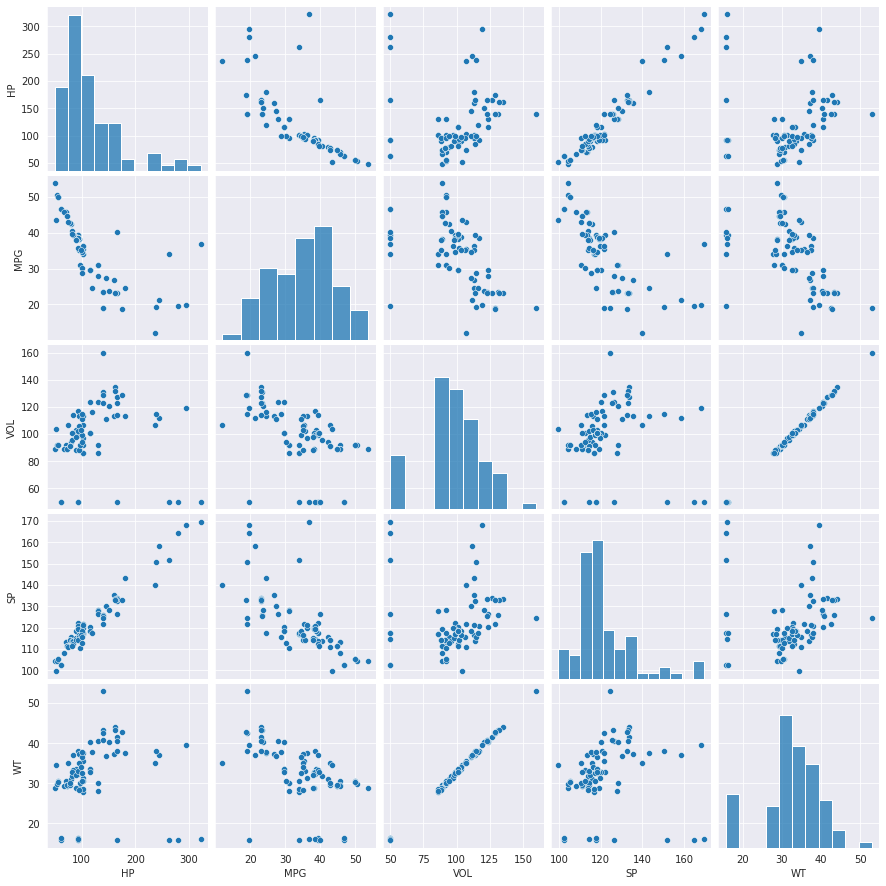

In [ ]:
sns.set_style(style="darkgrid")
sns.pairplot(cars)

# Preparing Model

In [ ]:
model=smf.ols("MPG~WT+VOL+SP+HP",data=cars).fit()

In [ ]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [ ]:
print("***t-values***","\n",model.tvalues,"\n","***p-values","\n",model.pvalues)  # \n = New line

***t-values*** 
 Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 ***p-values 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
 (model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

# Simple Linear Regression Models.

In [ ]:
ml_v=smf.ols("MPG~VOL",data=cars).fit()
print(ml_v.tvalues,"\n",ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
ml_w=smf.ols("MPG~WT",data=cars).fit()
print(ml_w.tvalues,"\n",ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
ml_wv=smf.ols("MPG~WT+VOL",data=cars).fit()
print(ml_wv.tvalues,"\n",ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating Variance Inflation Factor (VIF)

In [ ]:
rsq_hp=smf.ols("HP~WT+VOL+SP",data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_wt=smf.ols("WT~HP+VOL+SP",data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_vol=smf.ols("VOL~WT+SP+HP",data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp=smf.ols("SP~WT+VOL+HP",data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

# Storing VIF values in new data frame
d1={"Variables":["HP","WT","VOL","SP"],"VIF":[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Subset Selection

### AIC ( Akaik )

In [ ]:
model=smf.ols("MPG~WT+SP+HP",data=cars).fit()
print(model.aic,rsq_wt) # feature which gives high r squared value and less AIC value should be kept.

476.29927501529767 0.9984363610296332


In [ ]:
model=smf.ols("MPG~VOL+SP+HP",data=cars).fit()
print(model.aic,rsq_vol)

475.9875158854609 0.9984345797174133


# Residual Analysis

Test for normality of residuals (Q-Q plot)

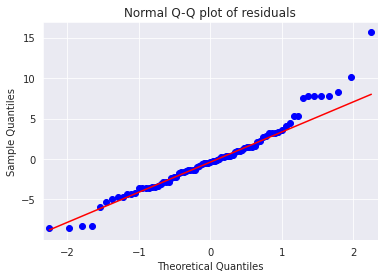

In [ ]:
import statsmodels.api as sm
model=smf.ols("MPG~VOL+SP+HP",data=cars).fit()
qqplots=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [ ]:
# to print index values whose y value is more than 10
list(np.where(model.resid>10))

[array([ 0, 76])]

# Residual plot for Homoscedasticity: Constant Variance

In [ ]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std() # This is Z-score=(Xi-mean)/Std. dev.

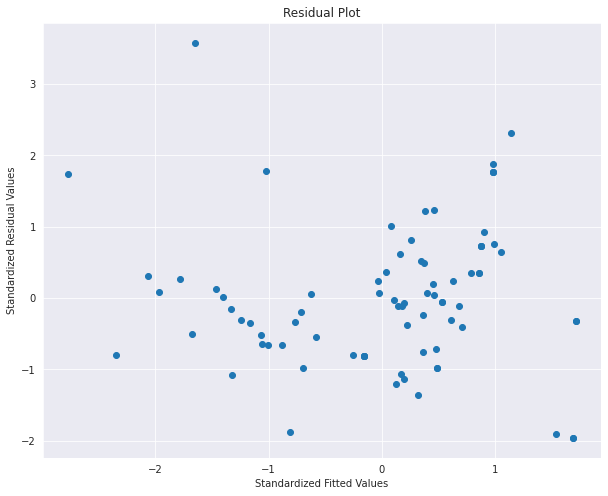

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model.fittedvalues),  # fittedvalue is y hat
            get_standardized_values(model.resid))         # model.resid is error
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

# Residual vs Regressors

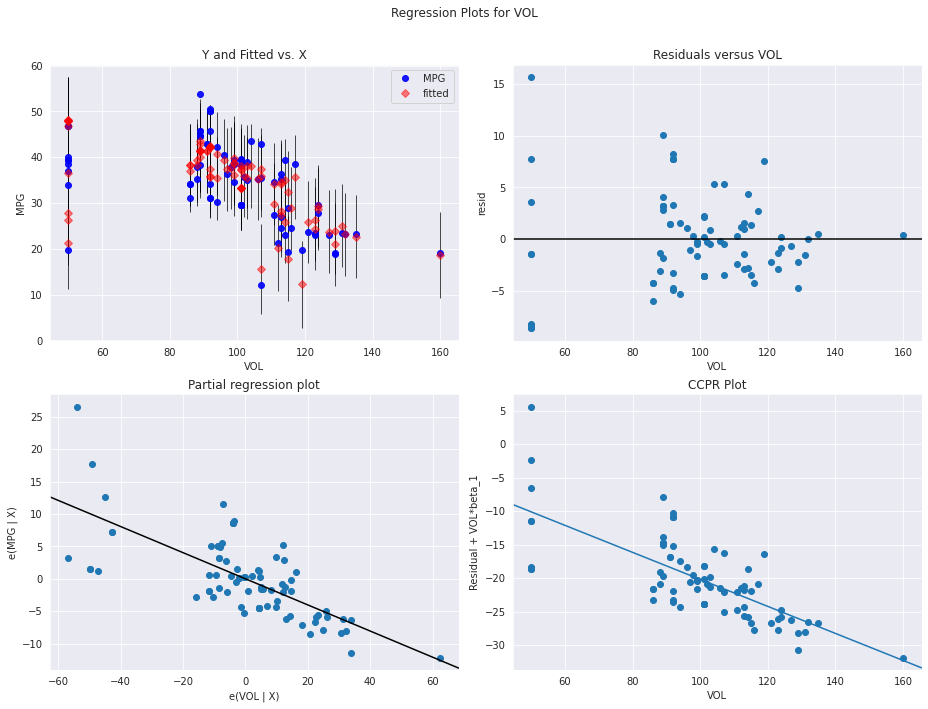

In [ ]:
fig=plt.figure(figsize=(13,10))
fig=sm.graphics.plot_regress_exog(model,"VOL",fig=fig)
plt.show()

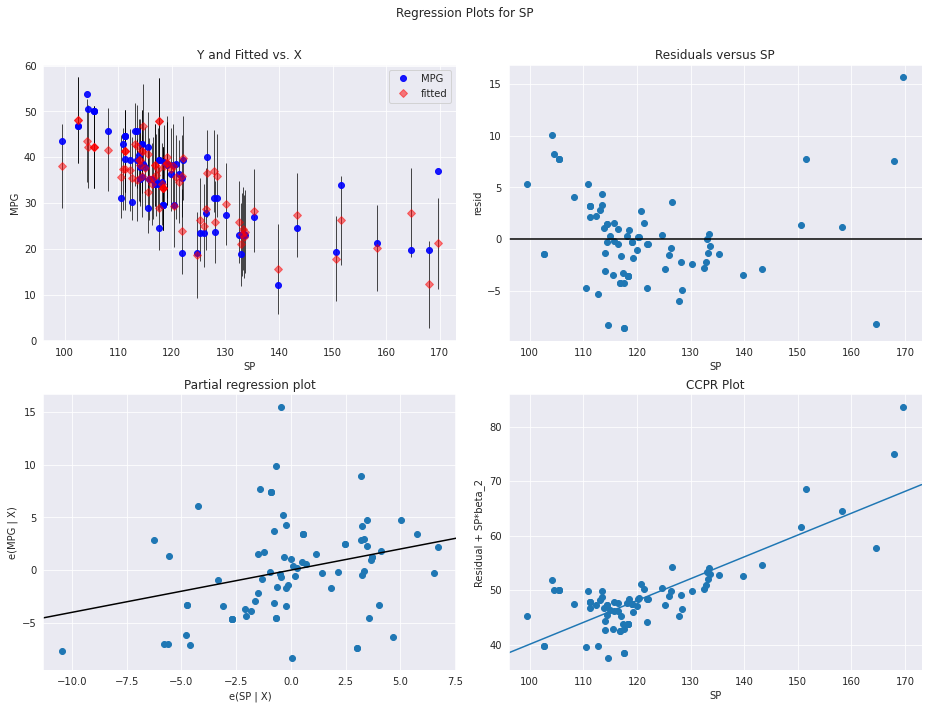

In [ ]:
fig=plt.figure(figsize=(13,10))
fig=sm.graphics.plot_regress_exog(model,"SP",fig=fig)
plt.show()

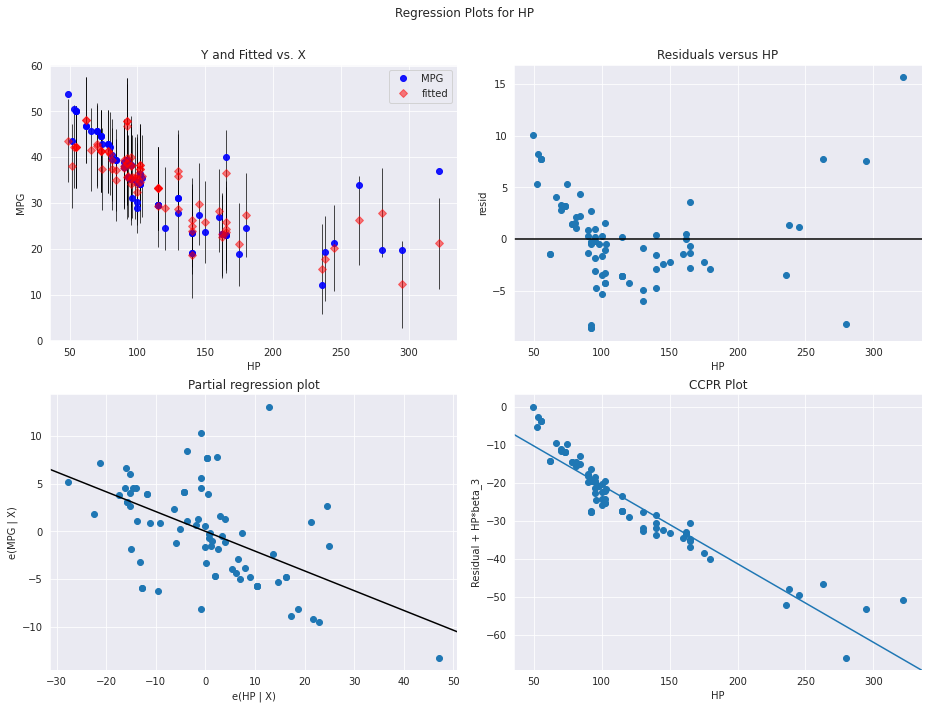

In [ ]:
fig=plt.figure(figsize=(13,10))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

# Model Deletion Diagnostics

### Detecting Influencers/Outliers

## Cook's Distance

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-26-262748c2dc6e>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars)),np.round(c,3))  #Index values of car on x-axis


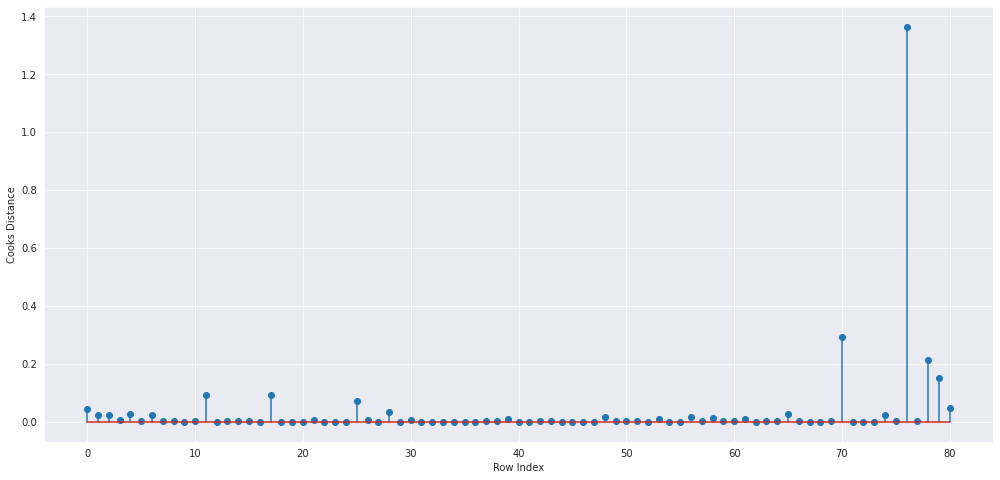

In [ ]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(17,8))
plt.stem(np.arange(len(cars)),np.round(c,3))  #Index values of car on x-axis
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [ ]:
(np.argmax(c),np.max(c))  # Argmax() gives index value of max value in dataset.

(76, 1.364174386910332)

# High Influence Points

In [ ]:
cars.shape

(81, 5)

In [ ]:
k=cars.shape[1]
n=cars.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.2222222222222222

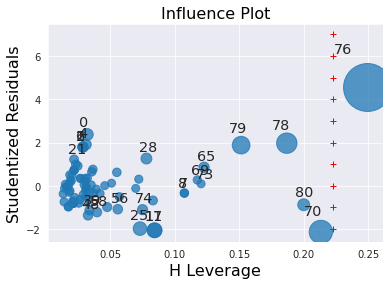

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.3)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,"r+")

In [ ]:
cars[cars.index.isin([70,76])]  # From the above plot, it is evident that data point 70 &76 are influencers.

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the Model

In [ ]:
# Load the data
cars_new=pd.read_csv("/content/Cars.csv")

In [ ]:
#Discard the data points which are influncers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [ ]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [ ]:
#Drop the original index
car1=car1.drop(["index"],axis=1)

In [ ]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [ ]:
final_ml_V=smf.ols("MPG~VOL+SP+WT",data=car1).fit()

In [ ]:
final_ml_V.rsquared,final_ml_V.aic

(0.7115968759077758, 481.69436085324617)

In [ ]:
final_ml_W=smf.ols("MPG~WT+SP+HP",data=car1).fit()

In [ ]:
final_ml_W.rsquared,final_ml_W.aic

(0.8160034320495303, 446.1884323575032)

Comparing above R-square and AIC values,model "final_ml_V" has high R-square and low AIC value hence include variable "VOL"  collinearity problem would be resolved and discard "WT"

In [ ]:
model_influence_V=final_ml_V.get_influence()
(c_V,_)=model_influence_V.cooks_distance

<ipython-input-62-569f1e7e4212>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car1)),np.round(c_V,3));


Text(0, 0.5, 'Cooks Distance')

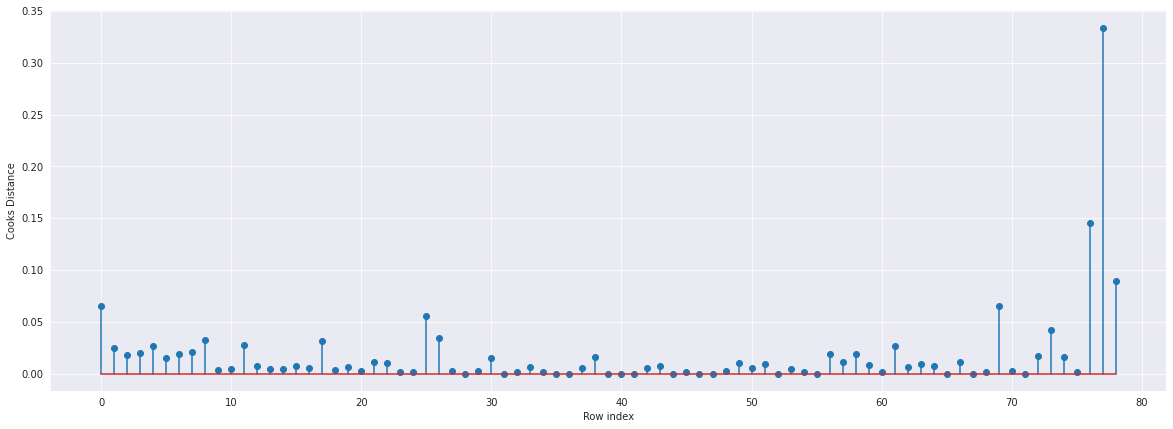

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

In [ ]:
(np.argmax(c_V),np.max(c_V))

(77, 0.333683313928413)

In [ ]:
car2=car1.drop(car1.index[[76,77]],axis=0)

In [ ]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
car3=car2.reset_index()

In [ ]:
car4=car3.drop(["index"],axis=1)

In [ ]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Build the model on the new data
final_ml_V=smf.ols("MPG~VOL+SP+HP",data=car4).fit()

In [ ]:
#Again check for influencers
model_influence_V=final_ml_V.get_influence()
(c_V,_)=model_influence_V.cooks_distance

<ipython-input-75-dff481da986b>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car4)),np.round(c_V,3));


Text(0, 0.5, 'Cooks Distance')

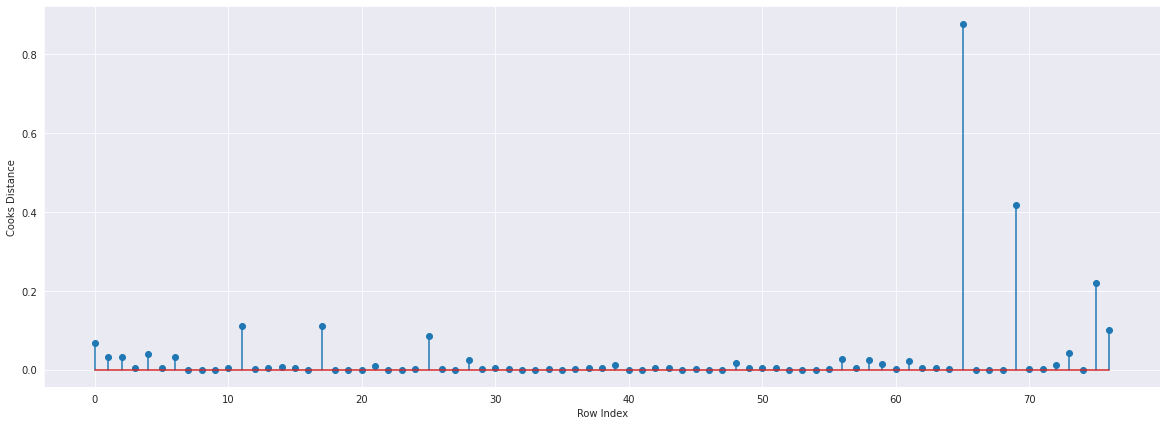

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")

In [ ]:
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296674)

Since the value is <1m, we can stop the diagnostic process and finalize the model.

In [ ]:
final_ml_V=smf.ols("MPG~VOL+SP+HP",data=car4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8669636111859063, 409.4153062719508)

## Predicting for new data

In [ ]:
new_data=pd.DataFrame({"HP":40,"VOL":95,"SP":102,"WT":35},index=["index 1"])

In [ ]:
new_data

,HP,VOL,SP,WT
index 1,40,95,102,35


In [ ]:
final_ml_V.predict(new_data)

index 1    46.035594
dtype: float64